We need to predict the sales based on the data

In [4]:
#Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Getting the data
traindata='bigdata-train.csv'
testdata='bigdata-test.csv'

In [5]:
#Reading the data into train and test
train=pd.read_csv(traindata)
test=pd.read_csv(testdata)

In [10]:
#Veiwing the dataset train
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


We can see there are 12 columns, there are some missing values also. Item _outlet_sales is our target variable

In [6]:
#about train dataset
train.shape

(8523, 12)

There are 8523 rows and 12 columns in train dataset

In [11]:
#Veiwing the dataset test
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


There are 11 columns only, we need to predict the sales for these data based on the model made using train data

In [7]:
#about test dataset
test.shape

(5681, 11)

There are 5681 rows and 11 columns in test dataset

In [14]:
#Lets see the columns in both the data sets
print("columns in train dataset:\n",train.columns)
print("columns in test dataset:\n",test.columns)


columns in train dataset:
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
columns in test dataset:
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


We can see all the column names are same, only the sales column is missing in test data

In [16]:
#Adding the column Item_Outlet_Sales to test data
test['Item_Outlet_Sales']=np.nan
test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN


In [17]:
#Now let us merge both the datasets

#Before merging adding new column source to find from where the data is  for less confusion 
train['Source']='train'
test['Source']='test'

#Merging the data sets
data = pd.concat([train, test], ignore_index=True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [18]:
data.shape

(14204, 13)

Now there are 14204 rows and 13 columns (Combinede data)

In [22]:
#Changing column names to small letters
data.columns=data.columns.str.lower()
data.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales', 'source'],
      dtype='object')

Now all the letters in columns are in lower case

In [23]:
#Let us see the info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            14204 non-null  object 
 1   item_weight                11765 non-null  float64
 2   item_fat_content           14204 non-null  object 
 3   item_visibility            14204 non-null  float64
 4   item_type                  14204 non-null  object 
 5   item_mrp                   14204 non-null  float64
 6   outlet_identifier          14204 non-null  object 
 7   outlet_establishment_year  14204 non-null  int64  
 8   outlet_size                10188 non-null  object 
 9   outlet_location_type       14204 non-null  object 
 10  outlet_type                14204 non-null  object 
 11  item_outlet_sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [24]:
#Checkong for missing values
data.isnull().sum()

item_identifier                 0
item_weight                  2439
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  4016
outlet_location_type            0
outlet_type                     0
item_outlet_sales            5681
source                          0
dtype: int64

Missing values are in weight , outlet size column . Missing in sales are those to be predicted, which are in test dataset

1. Filling the missing values

In [25]:
#Brief stats about that column
data['item_weight'].describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: item_weight, dtype: float64

In [26]:
#filling the column with its mean.... since it is normally distributed where mean and median are close to each other
data['item_weight'].fillna(data['item_weight'].mean(),inplace=True)

Filled the missing value with its mean

In [27]:
data['item_weight'].isnull().sum()

0

Now no null values in the column

In [28]:
#Now fillin the missing values in outlet_size
data['outlet_size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

We can see there are 3 types of sizes in outlets, it will be based on the store.

In [32]:
#Let us see the sizes bzsed on the type of store
from scipy.stats import mode

data['outlet_size'] = data['outlet_size'].fillna('unknown')

outlet_size_type=data.pivot_table(values='outlet_size', index='outlet_type', aggfunc=(lambda x:mode(x).mode[0]))
outlet_size_type

,outlet_size
outlet_type,
Grocery Store,unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


From this we can see the missing values are of Grocerry store. Grocery will be smaller than the Supermarkets,let us fill ith with small 

In [37]:
#Replacing the unknown to Small, as we thought earlier , since it is Grocery Store
data['outlet_size'].replace('unknown','Small',inplace=True)

In [38]:
#Checking the values inside the column
data['outlet_size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [39]:
data['outlet_size'].isnull().sum()

0

Now there are no missing values

In [41]:
#Let us see no. of unique elements in each column
unique=[]
for i in data.columns:
    unique.append(data[i].nunique())
unique

[1559, 416, 5, 13006, 16, 8052, 10, 9, 3, 3, 4, 3493, 2]

We got unique elements present in each column

In [44]:
#Let us see clearly which column and unique elements in it
uni_el=pd.DataFrame({})
uni_el['Column']=data.columns
uni_el['Elements Count']=unique
uni_el

,Column,Elements Count
0,item_identifier,1559
1,item_weight,416
2,item_fat_content,5
3,item_visibility,13006
4,item_type,16
5,item_mrp,8052
6,outlet_identifier,10
7,outlet_establishment_year,9
8,outlet_size,3
9,outlet_location_type,3


In [46]:
#Let us check for the fat content
data['item_fat_content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: item_fat_content, dtype: int64

we can see Regular and reg are same, also Low Fat , LF and low fat are same

In [47]:
#Let us replace them
data['item_fat_content'].replace('reg','Regular',inplace=True)
data['item_fat_content'].replace('LF','Low Fat',inplace=True)
data['item_fat_content'].replace('low fat','Low Fat',inplace=True)

In [48]:
#Replaced them , let us check
data['item_fat_content'].value_counts()


Low Fat    9185
Regular    5019
Name: item_fat_content, dtype: int64

Now there are only 2 varities in this column

In [49]:
#Cheking item type
data['item_type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: item_type, dtype: int64

There are  16 type of categories

In [55]:
#outlet identifiers
print("No. of outlets:",data['outlet_identifier'].nunique())
data['outlet_identifier'].value_counts()

No. of outlets: 10


OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: outlet_identifier, dtype: int64

There are 10 different stores, we can see their frequancy .. i.e each store may contain that many products.
We can see only one store has the all the 1559 items in it.

In [57]:
data['outlet_type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: outlet_type, dtype: int64

Out of 10 stores ... there are 4 types of them .. they are : Grocery Store, supermarket type- 1/2/3

In [58]:
#Brief statistics of all the data
data.describe(include='all')

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,source
count,14204,14204.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,14204,14204,14204,8523.000000,14204
unique,1559,NaN,2,NaN,16,NaN,10,NaN,3,3,4,NaN,2
top,NCZ30,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Small,Tier 3,Supermarket Type1,NaN,train
freq,10,NaN,9185,NaN,2013,NaN,1559,NaN,7996,5583,9294,NaN,8523
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914,NaN
std,NaN,4.234226,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,NaN
25%,NaN,9.300000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400,NaN
50%,NaN,12.792854,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000,NaN
75%,NaN,16.000000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400,NaN


In [60]:
data['item_visibility'].median()

0.05402053650000001

In [59]:
#We can see item visibility is 0 , but it can't be..so let us fill it 
data['item_visibility'].skew()

1.1951751774587889

In [62]:
#it is not normally distributed, so we will replace 0 with median
data['item_visibility'].replace("0",data['item_visibility'].median(),inplace=True)

In [64]:
data.dtypes

item_identifier               object
item_weight                  float64
item_fat_content              object
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type          object
outlet_type                   object
item_outlet_sales            float64
source                        object
dtype: object

In [69]:
#Converting all object types into float - using encoding technique
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=['item_identifier','item_fat_content','item_type','outlet_size','outlet_location_type','outlet_type','outlet_identifier']
for i in col:
    data[i]=le.fit_transform(data[i])
data

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,source
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,train
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,train
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,train
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800,train
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,1,0.013496,13,141.3154,8,1997,2,0,1,NaN,test
14200,308,7.60,1,0.142991,15,169.1448,3,2009,1,2,2,NaN,test
14201,1426,10.00,0,0.073529,8,118.7440,7,2002,2,1,1,NaN,test
14202,521,15.30,1,0.000000,3,214.6218,2,2007,2,1,1,NaN,test


Now all the columns have numerical values

Entire data Set is encoded . Let us split the two data sets, train and test

In [74]:
traind=data.loc[data['source']=='train']
testd=data.loc[data['source']=='test']

Now we splitted the encoded datasets

In [76]:
#Removing unnecessary columns - source from both & outlet sales from test data
traind.drop('source',axis=1,inplace=True)
testd.drop(['source','item_outlet_sales'],axis=1,inplace=True)

We removed the unnecessarey columns

In [84]:
traind.shape

(8523, 12)

In [ ]:
Now it is original dataset of train but with encoded values

In [85]:
testd.shape

(5681, 11)

In [ ]:
Now it is original dataset of test but with encoded values

In [77]:
#Now let us work on traind
traind.skew()

item_identifier             -0.008877
item_weight                  0.098453
item_fat_content             0.616705
item_visibility              1.167091
item_type                    0.101655
item_mrp                     0.127202
outlet_identifier           -0.059861
outlet_establishment_year   -0.396641
outlet_size                 -0.861866
outlet_location_type        -0.209093
outlet_type                  0.927438
item_outlet_sales            1.177531
dtype: float64

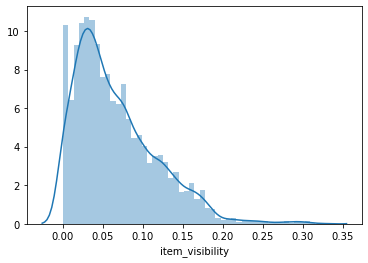

In [81]:
#Skewness is more in visibility
sns.distplot(traind['item_visibility'])

In [83]:
traind['item_visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: item_visibility, dtype: float64

In [86]:
traind['item_visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: item_visibility, Length: 7880, dtype: int64

there are 526 values of 0 in it.

In [90]:
traind['item_visibility']=traind['item_visibility']+0.01
traind['item_visibility'].value_counts()

0.010000    526
0.086975      3
0.071425      2
0.167076      2
0.096765      2
           ... 
0.021072      1
0.028439      1
0.162024      1
0.105065      1
0.092179      1
Name: item_visibility, Length: 7880, dtype: int64

We added a constant value of 0.01 , since we cant transform if 0 

In [91]:
#To remove skewness
traind['item_visibility']=np.log(traind['item_visibility'])
traind['item_visibility'].skew()

-0.5353363131549069

we reduced the skewness

In [92]:
#Checking for correlation
traind.corr()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
item_identifier,1.000000,0.044445,-0.114660,-0.024298,-0.017973,0.012853,-0.008602,-0.012772,0.001229,0.003656,-0.001178,0.002869
item_weight,0.044445,1.000000,-0.021142,-0.006533,0.028022,0.024806,-0.007897,-0.004267,-0.013747,0.003552,-0.002932,0.011083
item_fat_content,-0.114660,-0.021142,1.000000,0.045249,-0.139434,0.006063,0.000764,0.003151,-0.001262,-0.001598,0.002199,0.018719
item_visibility,-0.024298,-0.006533,0.045249,1.000000,-0.039118,0.006635,-0.068812,-0.046850,0.066590,-0.019204,-0.120901,-0.087693
item_type,-0.017973,0.028022,-0.139434,-0.039118,1.000000,0.032651,0.001656,0.004970,-0.000218,0.003084,0.003053,0.017048
item_mrp,0.012853,0.024806,0.006063,0.006635,0.032651,1.000000,0.003319,0.005020,0.000872,0.000232,-0.001975,0.567574
outlet_identifier,-0.008602,-0.007897,0.000764,-0.068812,0.001656,0.003319,1.000000,0.079035,0.260272,-0.716176,0.099873,0.162325
outlet_establishment_year,-0.012772,-0.004267,0.003151,-0.046850,0.004970,0.005020,0.079035,1.000000,0.425534,-0.089216,-0.122304,-0.049135
outlet_size,0.001229,-0.013747,-0.001262,0.066590,-0.000218,0.000872,0.260272,0.425534,1.000000,-0.480075,-0.401373,-0.162753
outlet_location_type,0.003656,0.003552,-0.001598,-0.019204,0.003084,0.000232,-0.716176,-0.089216,-0.480075,1.000000,0.467219,0.089367


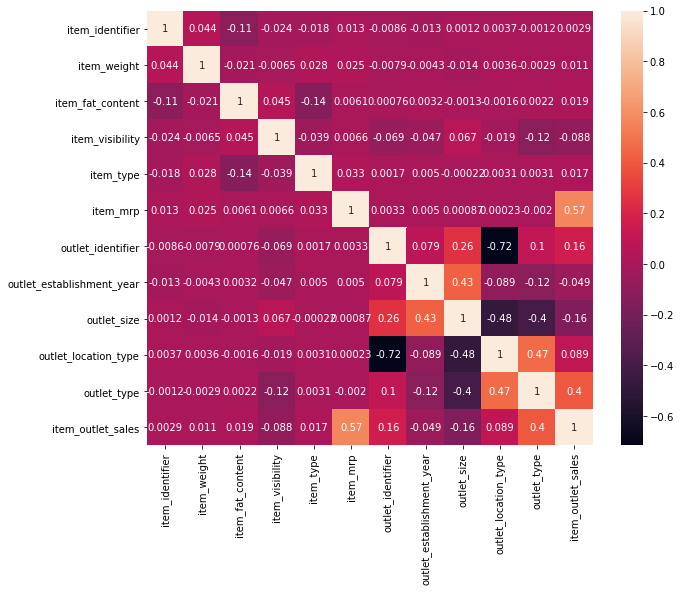

In [96]:
plt.figure(figsize=(10,8))
sns.heatmap(traind.corr(),annot=True)

Sending the data to model for predictions

In [111]:
traind.shape

(8523, 12)

In [112]:
x=traind.drop('item_outlet_sales',axis=1)
y=traind['item_outlet_sales']

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [121]:
#Finding the best random state
le=LinearRegression()
r2=0
mse=0
score=0
for i in range(5000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    le.fit(x_train,y_train)
    predle=le.predict(x_test)
    scores=le.score(x_train,y_train)
    r2s=r2_score(y_test,predle)
    mses=mean_squared_error(y_test,predle)
    if scores>score:
        score=scores
        r2=r2s
        mse=mses
print(f"The max score is {score} at random state {i} where the r2socre is {r2s} and mse is {mse}")

The max score is 0.5156418613224139 at random state 4999 where the r2socre is 0.49953074166367806 and mse is 1584667.709919405


Best random state is 4999

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4999)

In [123]:
#Now let us try other models with this best random state
#Since we are dealing with huge dataset, we will use Ensemble methods
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


In [125]:
models=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),LinearRegression()]
for m in models:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(f"score of {m}:",score)
    print(f"r2 score of {m}:",r2_score(y_test,predm))
    print(f"mean squared error of {m}:",mean_squared_error(y_test,predm))
    print("\n")

score of RandomForestRegressor(): 0.9392025981767822
r2 score of RandomForestRegressor(): 0.5328980870866791
mean squared error of RandomForestRegressor(): 1403193.146147782


score of AdaBoostRegressor(): 0.5226918861452541
r2 score of AdaBoostRegressor(): 0.5037931838633598
mean squared error of AdaBoostRegressor(): 1490625.4592966144


score of GradientBoostingRegressor(): 0.6437198553583456
r2 score of GradientBoostingRegressor(): 0.5754755073959656
mean squared error of GradientBoostingRegressor(): 1275288.8436669423


score of LinearRegression(): 0.5033310498930234
r2 score of LinearRegression(): 0.49953074166367806
mean squared error of LinearRegression(): 1503430.009042816




Gradient boosting regressor is having the highest r2 , nearer to 1 , but Random forest is having good score

In [127]:
#Let us check cross validation to find the best model
from sklearn.model_selection import cross_val_score
for m in models:
    cvscore=cross_val_score(m,x,y,cv=8)
    print(f"cv socre mean {m}:",cvscore.mean())

cv socre mean RandomForestRegressor(): 0.5545177174354032
cv socre mean AdaBoostRegressor(): 0.4690998489976056
cv socre mean GradientBoostingRegressor(): 0.5944581948571614
cv socre mean LinearRegression(): 0.5002690744577873


Linear regression has the least difference between cv score and r2 score

In [128]:
#Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Score:",lr.score(x_train,y_train))
print("r2 Score",r2_score(y_test,predlr))
print("mse:",mean_squared_error(y_test,predlr))

Score: 0.5033310498930234
r2 Score 0.49953074166367806
mse: 1503430.009042816


In [163]:
#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
dict={'fit_intercept':[False,True],'normalize':[True,False],'n_jobs':[1,5,10,15,50,100,1000],'positive':[True,False]}
grid=GridSearchCV(lr,param_grid=dict,cv=5)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)


0.5021404006545283
LinearRegression(fit_intercept=False, n_jobs=1, normalize=True)
{'fit_intercept': False, 'n_jobs': 1, 'normalize': True, 'positive': False}


In [169]:
#Now testing the output for test datase
best_model=LinearRegression(fit_intercept=False,n_jobs=1,normalize=True,positive=False)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
score=best_model.score(x_train,y_train)
print('score',score)
print('r2 score',r2_score(y_test,pred))
print('mse:',mean_squared_error(y_test,pred))

score 0.5031964955925808
r2 score 0.4998177601479562
mse: 1502567.7938413303


In [170]:
#Saving the best model
import joblib
joblib.dump(best_model,'predict.obj')

['predict.obj']

In [172]:
#testing the test data set
pred=best_model.predict(testd)
testd['item_sales']=pred

In [173]:
testd

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_sales
8523,1114,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1,1679.156993
8524,1078,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1,768.657007
8525,1420,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0,2029.489659
8526,817,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1,1773.165849
8527,1197,12.792854,1,0.118599,4,234.2300,5,1985,1,2,3,4933.397429
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1,2066.685439
14200,308,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2,2967.309633
14201,1426,10.000000,0,0.073529,8,118.7440,7,2002,2,1,1,1496.027086
14202,521,15.300000,1,0.000000,3,214.6218,2,2007,2,1,1,2732.899308
